<a href="https://colab.research.google.com/github/JonathanBath/summer-school/blob/master/Analyse_Umbrella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JonathanBath/summer-school.git

Cloning into 'summer-school'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 243 (delta 0), reused 0 (delta 0), pack-reused 240
Receiving objects: 100% (243/243), 12.01 MiB | 6.67 MiB/s, done.
Resolving deltas: 100% (63/63), done.


/content/summer-school/five


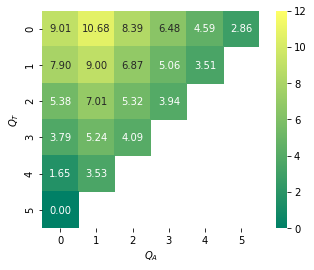

In [5]:
# change directory to 'four', 'five', 'six' for simulations at 30, 40 and 50°C
directory = '/content/summer-school/five'

import pandas as pd
import numpy as np
import seaborn as sns
import os
from functools import reduce

%cd $directory
files = os.listdir();

names = ['Q1','Q2','biased','unbiased','whitespace']

# load all data
data = [pd.read_csv(file, sep=' ', comment='#', names=names).set_index(['Q1','Q2']).drop(['biased','whitespace'], axis=1) for file in files]

# add data for each simulation
data = reduce(lambda x, y: x.add(y, fill_value=0), data)

data = data['unbiased'].to_numpy()
data = data.reshape(6,6)
RT = (1.987 * 303) / 1000 

anticodonWins = data[5,0]

ratio = data/anticodonWins

np.seterr(divide = 'ignore') 
dG = -RT * np.log2(ratio)
dG[5,0]*=-1
fig = sns.heatmap(np.ma.masked_invalid(dG), cmap='summer', annot=True, fmt='.2f', vmin=0, vmax=12, square=True);
fig.set(xlabel='$Q_A$', ylabel = '$Q_T$');

The way that this simulation works is that the system keeps count of how often each state is visited. The 'anticodon wins' state in the top right ($Q_A = 5, Q_T = 0$), the 'transfer wins' state in the bottom left ($Q_A = 0, Q_T = 5$) and all intermediate states. The more stable a state, the more time the simulation will spend in that state.

The plot shows $\Delta G$, the stability of each state relative to the 'transfer wins' state. The higher the $\Delta G$, the less often the state is visited in the simulation and the less stable the state is.

What we want to learn from the system is the difference in stability between the 'transfer wins' and the 'anticodon' wins.

For the simulation at 40°C, $\Delta G = 2.86\text{ }kcal\text{ }mol^{-1}$

$\Delta G = - RT ln K$

$(R = 1.987 cal / mol / K, T = 313 K)$

$K = \frac{\text{anticodon wins}}{\text{transfer wins}} = e^{-\frac{\Delta G }{RT}}$

In [4]:
import math
K = math.exp(-2860/(1.987*313))
1/K # the transfer wins state is more stable than the anticodon wins state by 100 fold

99.34323474508152